In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.pop('Unnamed: 0')

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


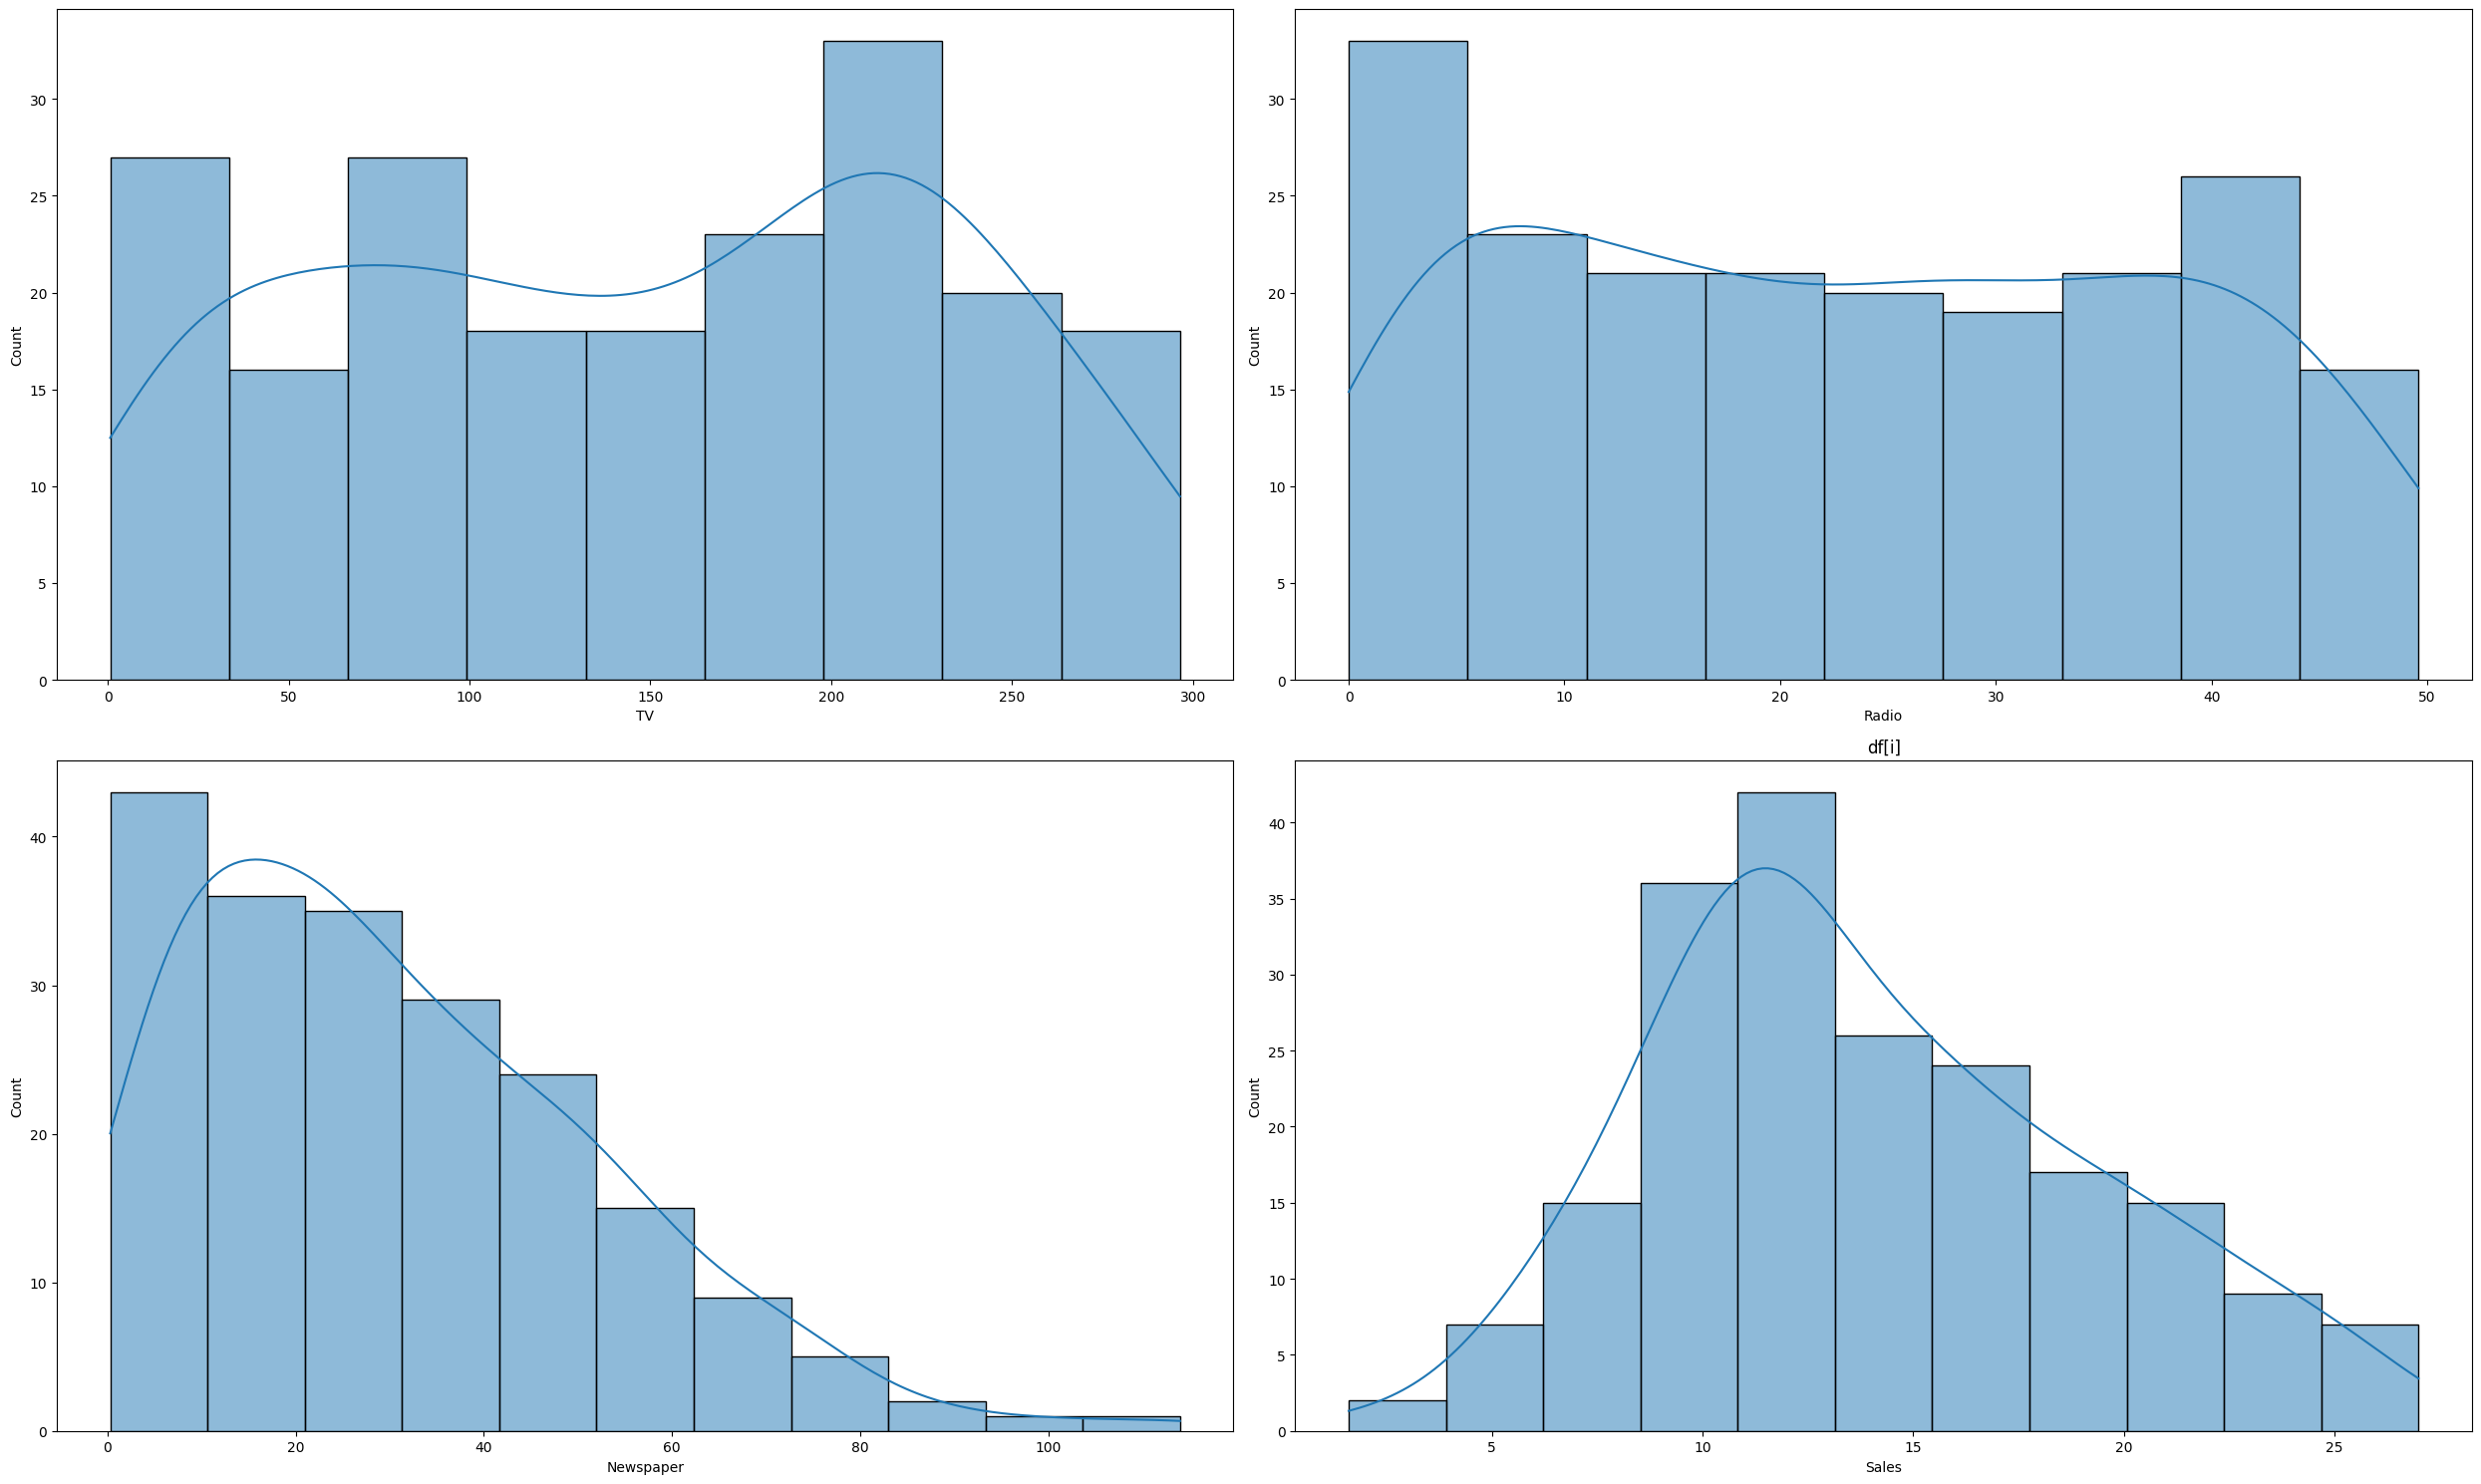

In [11]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

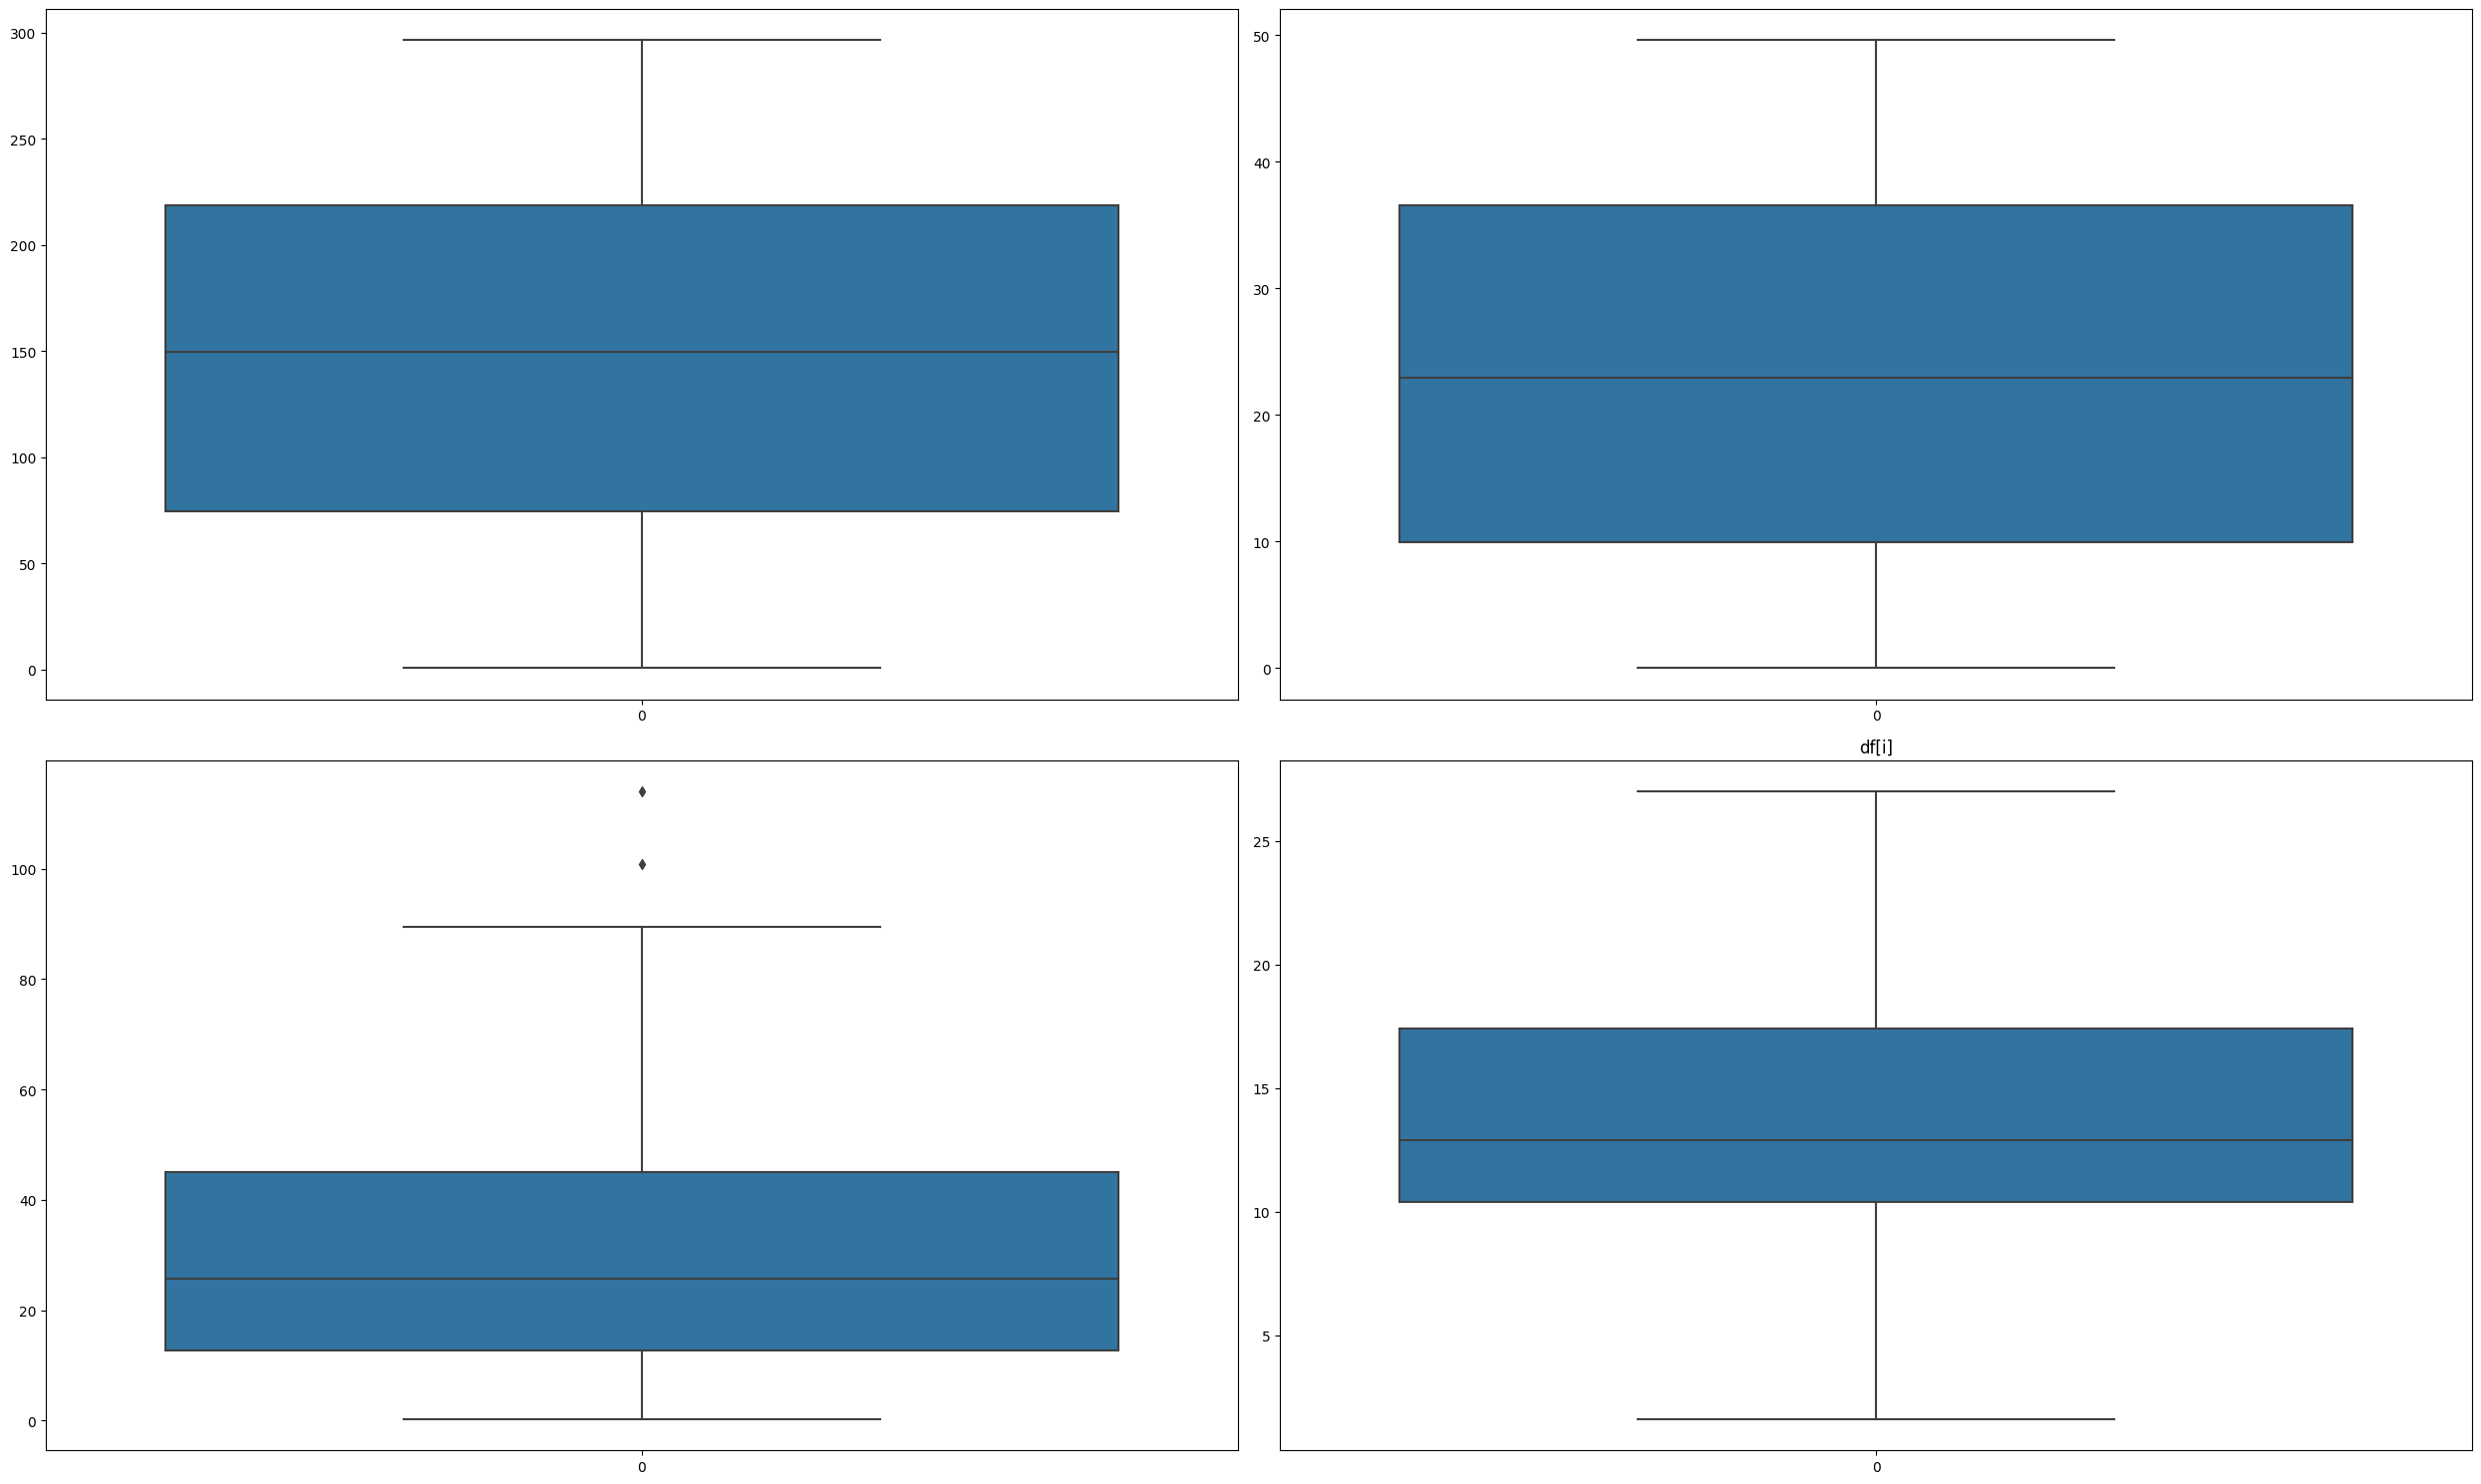

In [13]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

<Axes: >

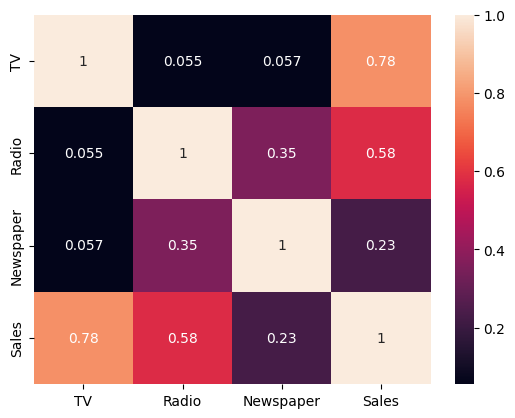

In [14]:
sns.heatmap(df.corr(),annot = True)

In [17]:
px.scatter(df,x='TV',y='Sales',width=800,height=500,title='Sale Vs TV')

In [18]:
px.scatter(df,x='Radio',y='Sales',width=800,height=500,title='Radio Vs TV')

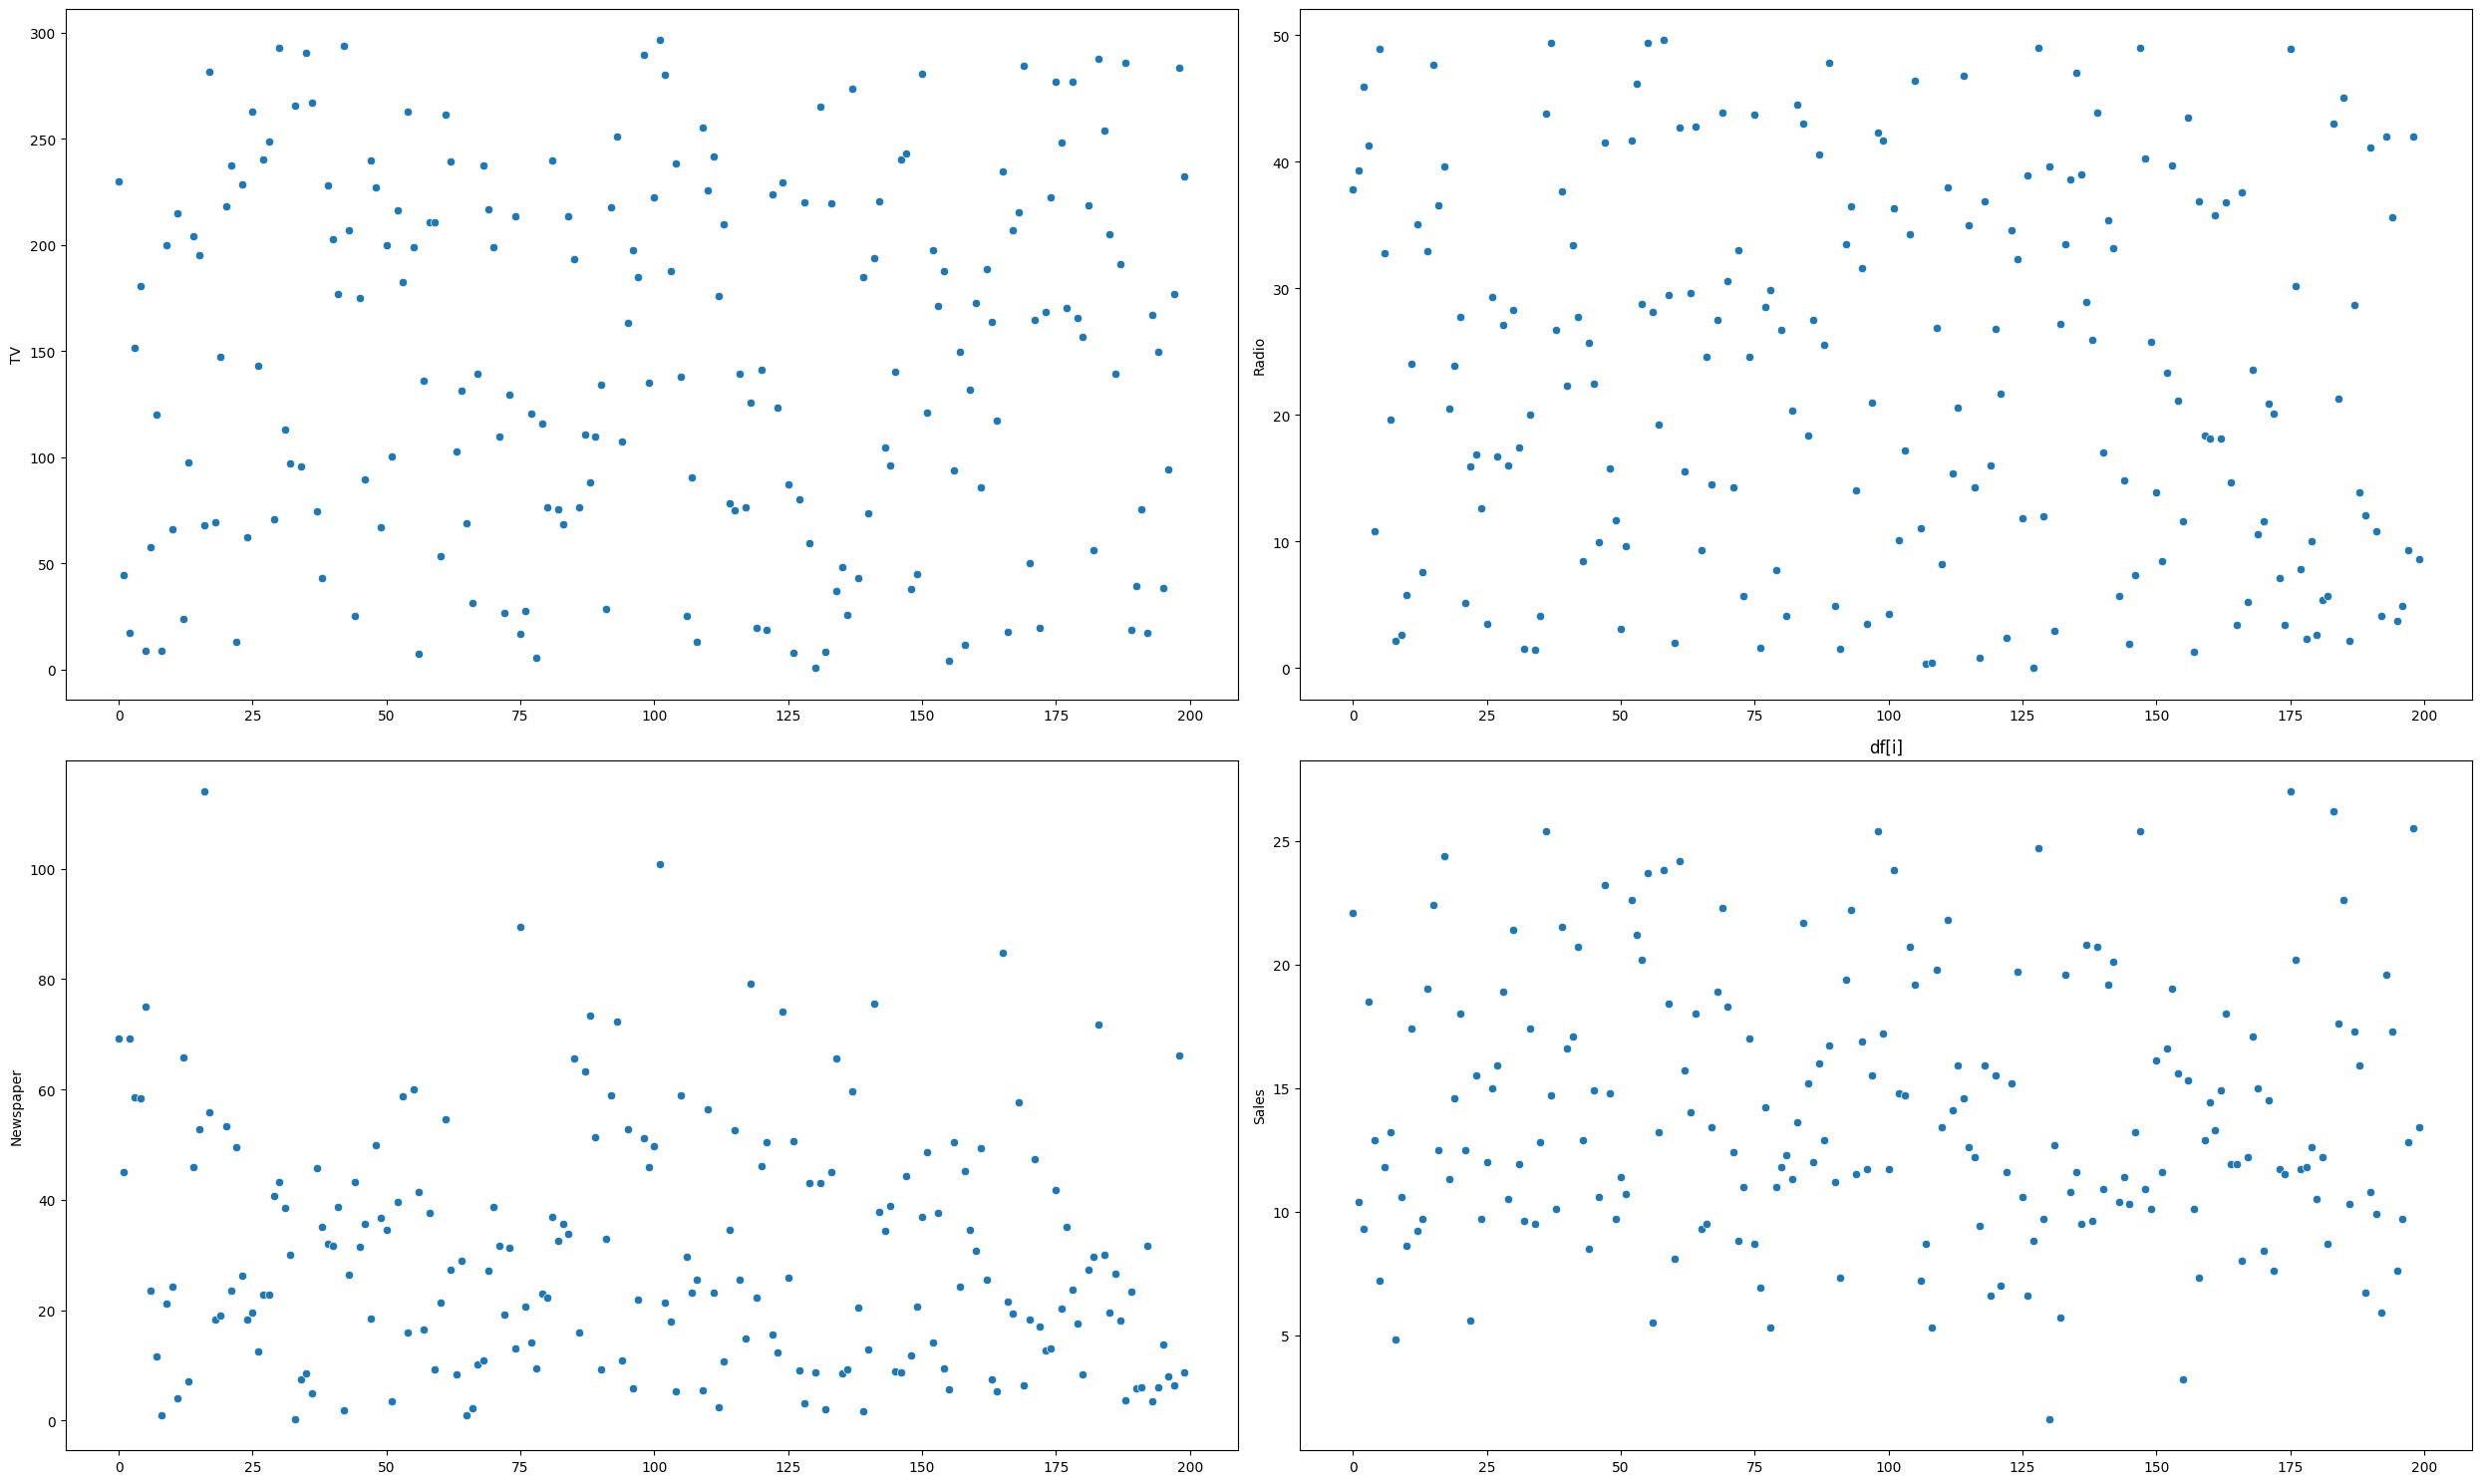

In [20]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.scatterplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

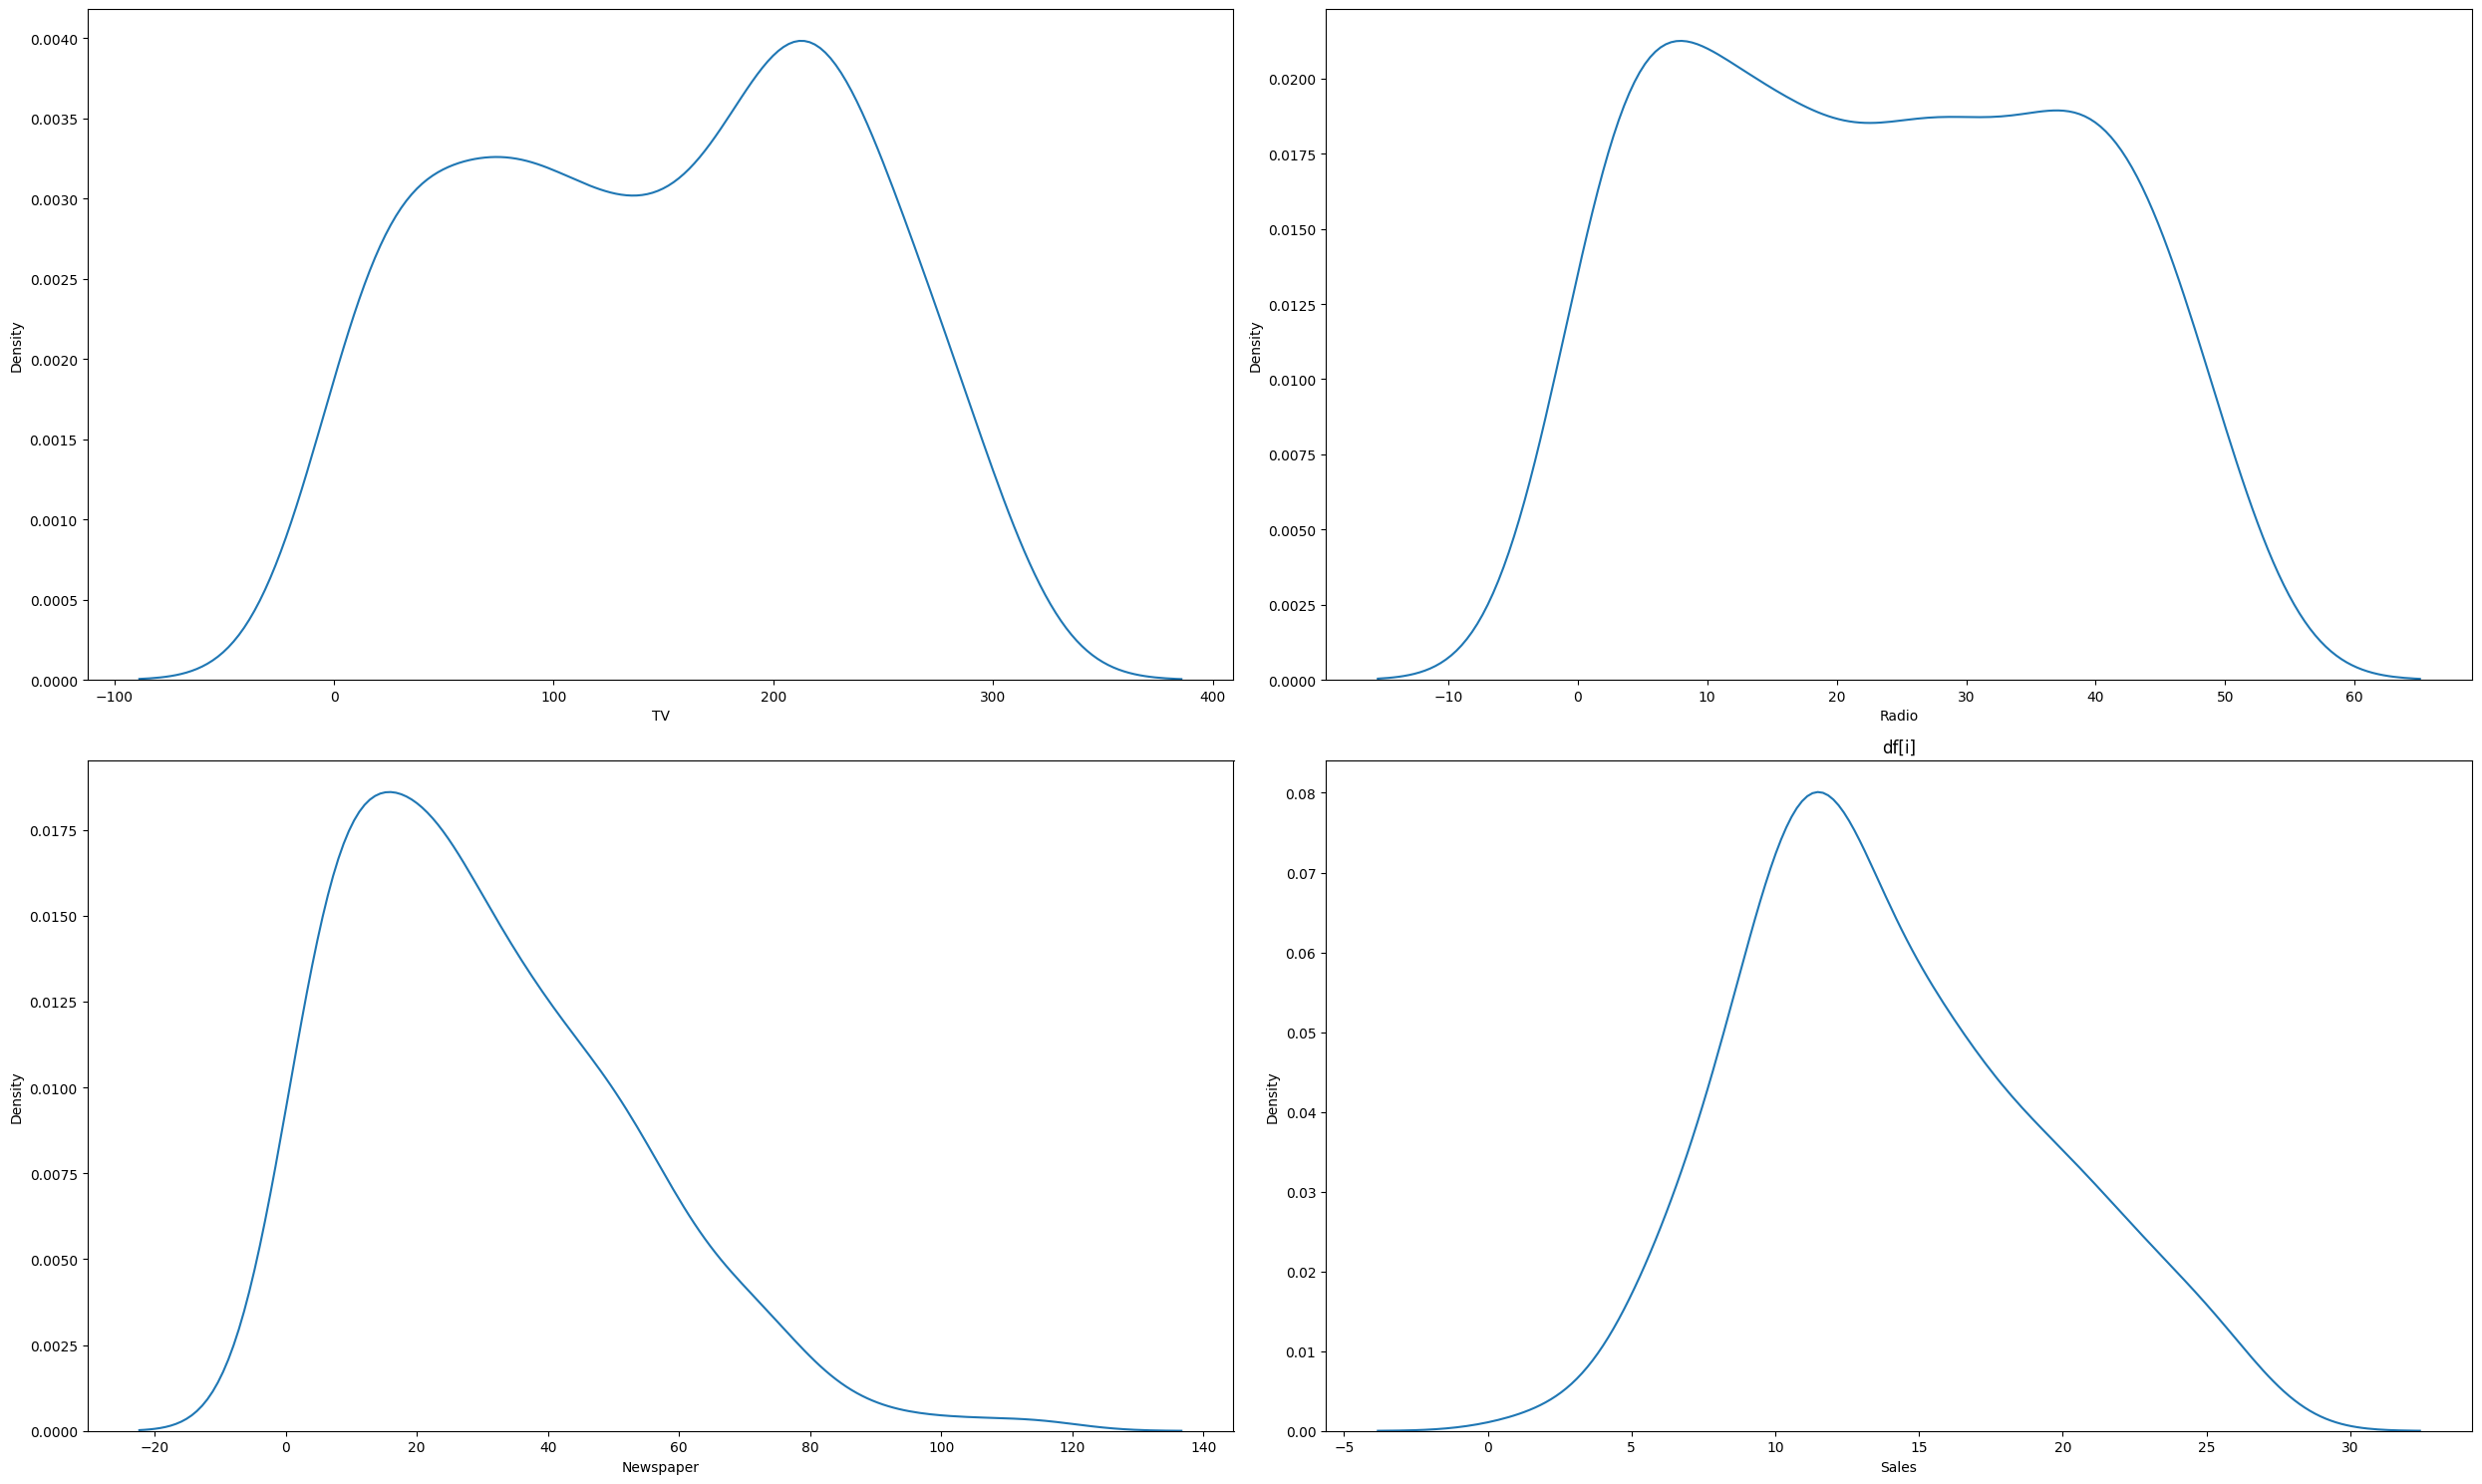

In [22]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [27]:
X = df.drop('Sales',axis =1)
y = df["Sales"]
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Models that are going to be trained
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
}

# Creating a function to train each regression model and calculate/return regression metrics
def train_reg(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2

# Lists to store regression metrics
mae_s = []
mse_s = []
r2_s = []

# Train and evaluate regression models
for name, model in regression_models.items():
    mae, mse, r2 = train_reg(model, X_train, y_train, X_test, y_test)

    mae_s.append(mae)
    mse_s.append(mse)
    r2_s.append(r2)


In [37]:
scores_df = pd.DataFrame({"Algorithm": regression_models.keys(),"r2_score : ":r2_s,"mse : ": mse_s,'mae : ':mae_s})
scores_df

,Algorithm,r2_score :,mse :,mae :
0,Linear Regression,0.757589,4.503126,1.646275
1,Decision Tree Regressor,0.956477,0.808500,0.670000
2,SVR,0.675391,6.030077,1.786495
3,Random Forest Regressor,0.971330,0.532594,0.602225
4,AdaBoost Regressor,0.950234,0.924470,0.813806
5,Gradient Boosting Regressor,0.974389,0.475765,0.560866
6,XGBoost Regressor,0.976863,0.429812,0.523696
